In [12]:
import pandas as pd
import torch
import numpy as np

from figures import create_heat_map_for_df,create_heat_map_for_tensor,create_hist_for_df,create_hist_for_tensor


original_dir  = "./data/prompt_entropys/original/"
transformed_dir = "./data/prompt_entropys/transformed/"

layer_start = 0
layer_end = 22


df  = pd.read_json("./data/prompt_entropys/data.json", lines=True, orient="records")
df = df.dropna()
print(len(df))


93


In [13]:
xlim = (0,1)
ylim = (0, 10000)

/tmp/ipykernel_4040691/3402784434.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  original_tensor = torch.load(original_dir + id + ".pt",map_location=torch.device('cpu')

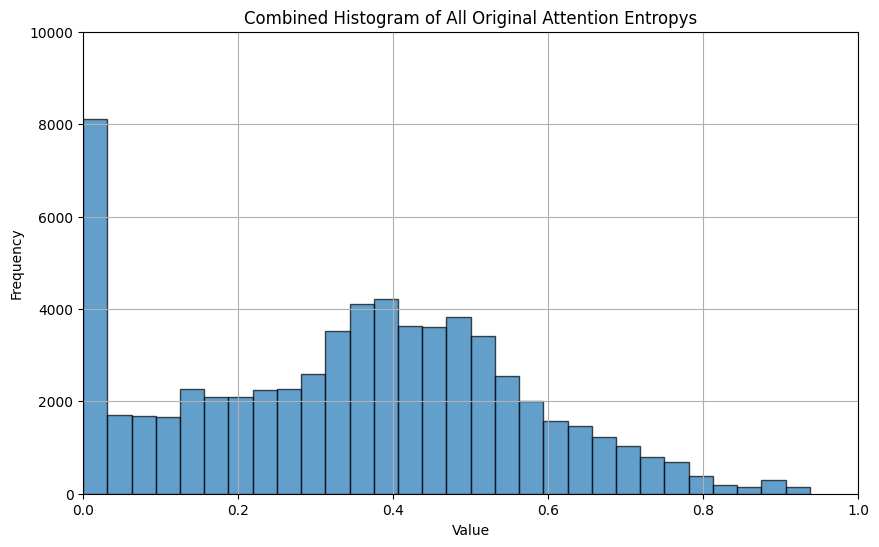

In [14]:
#load tensors 
original_tensors = []

for id, first_token_pos in list(zip(df["id"],df["original_first_token_pos"])):
    original_tensor = torch.load(original_dir + id + ".pt",map_location=torch.device('cpu')) 
    original_tensor = original_tensor[layer_start:layer_end]
    original_tensors.append(original_tensor)

title = 'Combined Histogram of All Original Attention Entropys'

create_hist_for_tensor(original_tensors,title=title,xlim=xlim,ylim=ylim)

/tmp/ipykernel_4040691/4293796957.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  transformed_tensor = torch.load(transformed_dir + id + ".pt",map_location=torch.device(

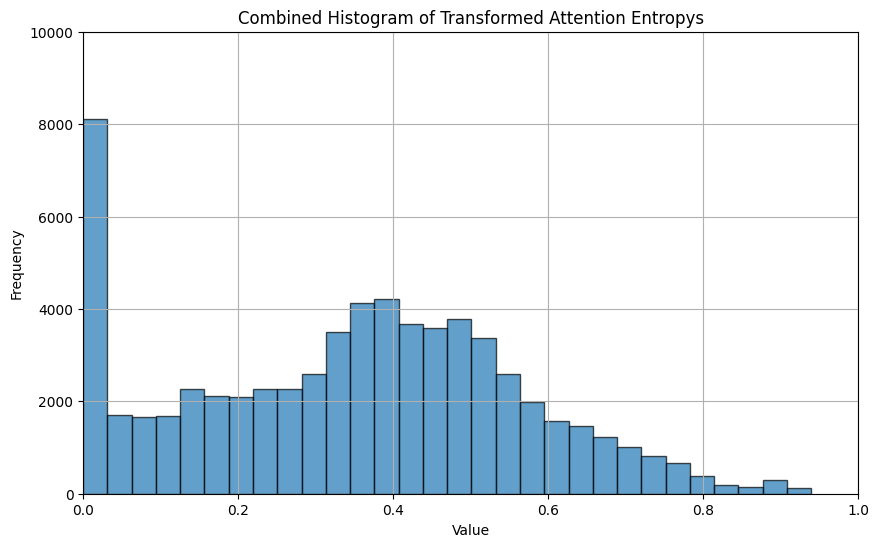

In [15]:
#load tensors 
transformed_tensors = []
for id, first_token_pos in list(zip(df["id"],df["transformed_first_token_pos"])):
    transformed_tensor = torch.load(transformed_dir + id + ".pt",map_location=torch.device('cpu')) 
    transformed_tensor = transformed_tensor[layer_start:layer_end]
    transformed_tensor = transformed_tensor[:,:,:,transformed_tensor.size(dim=-1)-1]
    transformed_tensors.append(transformed_tensor)

title = 'Combined Histogram of Transformed Attention Entropys'
create_hist_for_tensor(transformed_tensors,title=title,xlim=xlim,ylim=ylim)

In [16]:
original_values = np.concatenate([tensor.numpy().flatten() for tensor in original_tensors])
transformed_values = np.concatenate([tensor.numpy().flatten() for tensor in transformed_tensors])

print("mean original_values",original_values.mean())
print("mean transformed_values",transformed_values.mean())

mean original_values 0.34432623
mean transformed_values 0.34459722


In [17]:
avg_original_tensor = torch.stack([tensor for tensor in original_tensors])
avg_original_tensor = torch.squeeze(torch.mean(avg_original_tensor,dim=0))
avg_transformed_tensor = torch.stack([tensor for tensor in transformed_tensors])
avg_transformed_tensor = torch.squeeze(torch.mean(avg_transformed_tensor,dim=0))

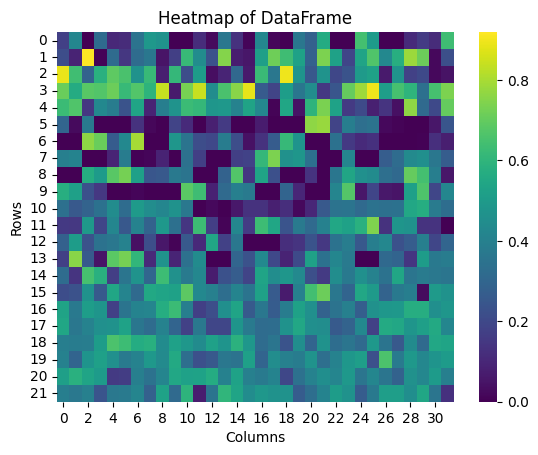

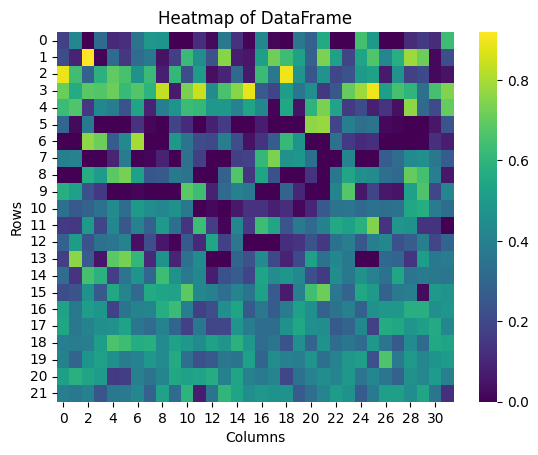

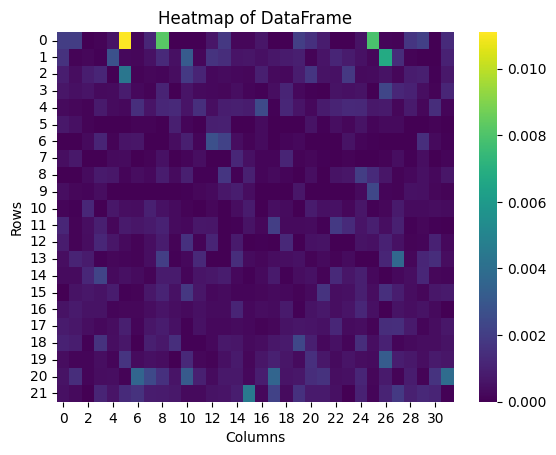

In [18]:
create_heat_map_for_tensor(avg_original_tensor)
create_heat_map_for_tensor(avg_transformed_tensor)

distance_tensor = avg_original_tensor - avg_transformed_tensor 
distance_tensor = distance_tensor.abs()
create_heat_map_for_tensor(distance_tensor)

In [19]:
create_hist_for_df(original_df, "original entropy weight")
create_hist_for_df(fake_df, "fake entropy weights")

NameError: name 'original_df' is not defined

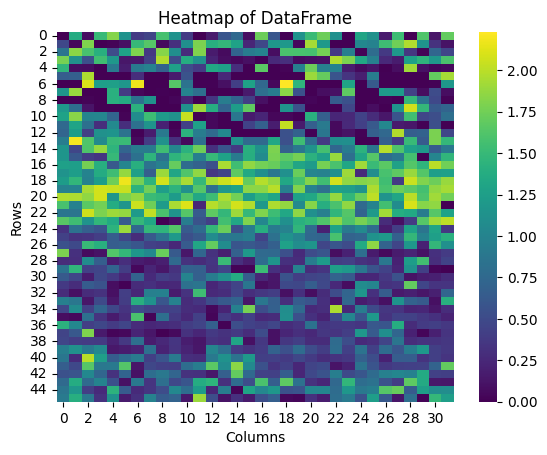

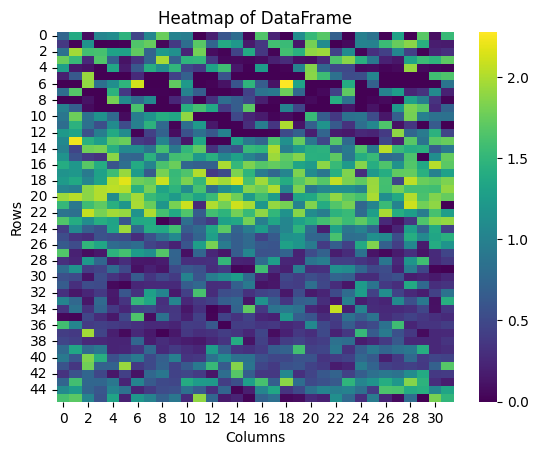

In [ ]:
create_heat_map_for_df(original_df)
create_heat_map_for_df(fake_df)

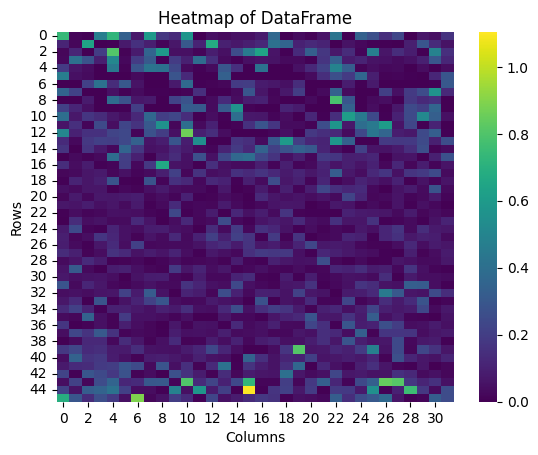

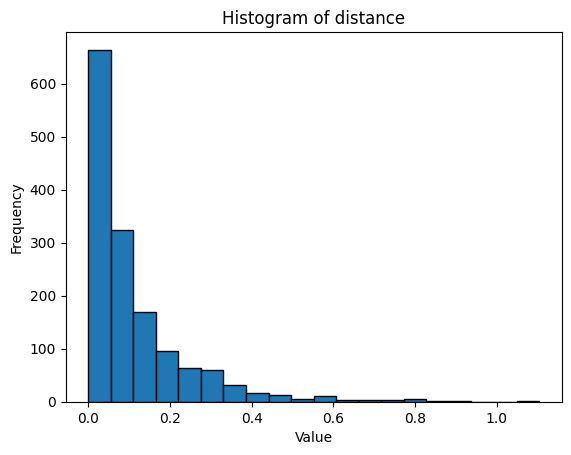

<Figure size 600x400 with 0 Axes>

In [ ]:
distance_df = original_df - fake_df 
distance_df = distance_df.abs()

create_heat_map_for_df(distance_df)
create_hist_for_df(distance_df,"distance")